## Classifier VS Regression use simple CNN architecture for Breast Density classification

### in this version I not only use validation set but also testing dataset

In [1]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import os

# define images pre-processing transform
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # resize for 224x224
    transforms.ToTensor(),         # convert to PyTorch Tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalization
])

# Define training set、validation set、testing Dataset
train_dataset = torchvision.datasets.ImageFolder(root='/home/kevinluo/breast_density_classification/datasets/train', transform=transform)
valid_dataset = torchvision.datasets.ImageFolder(root='/home/kevinluo/breast_density_classification/datasets/valid', transform=transform)
test_dataset = torchvision.datasets.ImageFolder(root='/home/kevinluo/breast_density_classification/datasets/test', transform=transform)

# training set、validation set、testing Dataset DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define simple CNN model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, 4)   # output layer has 4 neuron ，pair to 4 classes

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(-1, 128 * 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# create instance model and loss function、optimizer
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)



### 將model移去GPU device

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import os

# Check if GPU is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# define images pre-processing transform
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # resize for 224x224
    transforms.ToTensor(),         # convert to PyTorch Tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalization
])

# Define training set、validation set、testing Dataset
train_dataset = torchvision.datasets.ImageFolder(root='/home/kevinluo/breast_density_classification/datasets/train', transform=transform)
valid_dataset = torchvision.datasets.ImageFolder(root='/home/kevinluo/breast_density_classification/datasets/valid', transform=transform)
test_dataset = torchvision.datasets.ImageFolder(root='/home/kevinluo/breast_density_classification/datasets/test', transform=transform)

# training set、validation set、testing Dataset DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define simple CNN model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, 4)   # output layer has 4 neuron ，pair to 4 classes

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(-1, 128 * 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# create instance model and loss function、optimizer
net = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)



cuda:0


In [ ]:
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# # move model and loss function to GPU
# net.to(device)
# criterion.to(device)

# # training model
# for epoch in range(60):
#     running_loss = 0.0
#     for i, data in enumerate(train_loader, 0):
#         inputs, labels = data
#         inputs, labels = inputs.to(device), labels.to(device)  # move data to GPU
#         optimizer.zero_grad()
#         outputs = net(inputs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()
#         running_loss += loss.item()
#     print('Epoch %d loss: %.3f' % (epoch + 1, running_loss / len(train_loader)))

# # test model on validation set
# correct = 0
# total = 0
# with torch.no_grad():
#     for data in valid_loader:
#         images, labels = data
#         images, labels = images.to(device), labels.to(device)  # move data to GPU
#         outputs = net(images)
#         _, predicted = torch.max(outputs.data, 1)
#         total += labels.size(0)
#         correct += (predicted == labels).sum().item()
#     print('Accuracy on the validation set: %d %%' % (100 * correct / total))


### 修改過後的版本(多加進度條)

In [7]:
from tqdm import tqdm

# training model
for epoch in range(60):
    running_loss = 0.0
    for i, data in tqdm(enumerate(train_loader, 0), total=len(train_loader)):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)  # move data to GPU
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print('Epoch %d loss: %.3f' % (epoch + 1, running_loss / len(train_loader)))

# test model on validation set
correct = 0
total = 0
with torch.no_grad():
    for data in tqdm(valid_loader, total=len(valid_loader)):
        images, labels = data
        images, labels = images.to(device), labels.to(device)  # move data to GPU
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print('Accuracy on the validation set: %d %%' % (100 * correct / total))



100%|██████████| 116/116 [00:56<00:00,  2.05it/s]


Epoch 1 loss: 1.296


100%|██████████| 116/116 [00:54<00:00,  2.15it/s]


Epoch 2 loss: 1.274


100%|██████████| 116/116 [00:50<00:00,  2.31it/s]


Epoch 3 loss: 1.252


100%|██████████| 116/116 [00:50<00:00,  2.28it/s]


Epoch 4 loss: 1.225


100%|██████████| 116/116 [00:49<00:00,  2.36it/s]


Epoch 5 loss: 1.162


100%|██████████| 116/116 [00:47<00:00,  2.46it/s]


Epoch 6 loss: 1.161


100%|██████████| 116/116 [00:47<00:00,  2.43it/s]


Epoch 7 loss: 1.138


100%|██████████| 116/116 [00:46<00:00,  2.49it/s]


Epoch 8 loss: 1.137


100%|██████████| 116/116 [00:46<00:00,  2.49it/s]


Epoch 9 loss: 1.106


100%|██████████| 116/116 [00:44<00:00,  2.58it/s]


Epoch 10 loss: 1.083


100%|██████████| 116/116 [00:45<00:00,  2.56it/s]


Epoch 11 loss: 1.071


100%|██████████| 116/116 [00:44<00:00,  2.60it/s]


Epoch 12 loss: 1.058


100%|██████████| 116/116 [00:44<00:00,  2.63it/s]


Epoch 13 loss: 1.041


100%|██████████| 116/116 [00:42<00:00,  2.76it/s]


Epoch 14 loss: 1.052


100%|██████████| 116/116 [00:44<00:00,  2.59it/s]


Epoch 15 loss: 1.041


100%|██████████| 116/116 [00:42<00:00,  2.70it/s]


Epoch 16 loss: 1.013


100%|██████████| 116/116 [00:43<00:00,  2.68it/s]


Epoch 17 loss: 1.011


100%|██████████| 116/116 [00:42<00:00,  2.71it/s]


Epoch 18 loss: 0.987


100%|██████████| 116/116 [00:49<00:00,  2.33it/s]


Epoch 19 loss: 0.988


100%|██████████| 116/116 [00:52<00:00,  2.23it/s]


Epoch 20 loss: 0.970


100%|██████████| 116/116 [00:41<00:00,  2.80it/s]


Epoch 21 loss: 0.976


100%|██████████| 116/116 [00:42<00:00,  2.71it/s]


Epoch 22 loss: 0.939


100%|██████████| 116/116 [00:40<00:00,  2.89it/s]


Epoch 23 loss: 0.946


100%|██████████| 116/116 [00:41<00:00,  2.79it/s]


Epoch 24 loss: 0.940


100%|██████████| 116/116 [00:40<00:00,  2.83it/s]


Epoch 25 loss: 0.917


100%|██████████| 116/116 [00:41<00:00,  2.82it/s]


Epoch 26 loss: 0.942


100%|██████████| 116/116 [00:41<00:00,  2.79it/s]


Epoch 27 loss: 0.875


100%|██████████| 116/116 [00:41<00:00,  2.81it/s]


Epoch 28 loss: 0.869


100%|██████████| 116/116 [00:40<00:00,  2.87it/s]


Epoch 29 loss: 0.851


100%|██████████| 116/116 [00:38<00:00,  3.04it/s]


Epoch 30 loss: 0.846


100%|██████████| 116/116 [00:41<00:00,  2.79it/s]


Epoch 31 loss: 0.831


100%|██████████| 116/116 [00:38<00:00,  2.98it/s]


Epoch 32 loss: 0.793


100%|██████████| 116/116 [00:40<00:00,  2.88it/s]


Epoch 33 loss: 0.782


100%|██████████| 116/116 [00:41<00:00,  2.81it/s]


Epoch 34 loss: 0.741


100%|██████████| 116/116 [00:40<00:00,  2.86it/s]


Epoch 35 loss: 0.708


100%|██████████| 116/116 [00:39<00:00,  2.94it/s]


Epoch 36 loss: 0.686


100%|██████████| 116/116 [00:40<00:00,  2.85it/s]


Epoch 37 loss: 0.668


100%|██████████| 116/116 [00:41<00:00,  2.79it/s]


Epoch 38 loss: 0.645


100%|██████████| 116/116 [00:40<00:00,  2.89it/s]


Epoch 39 loss: 0.620


100%|██████████| 116/116 [00:41<00:00,  2.82it/s]


Epoch 40 loss: 0.586


100%|██████████| 116/116 [00:42<00:00,  2.73it/s]


Epoch 41 loss: 0.547


100%|██████████| 116/116 [00:40<00:00,  2.83it/s]


Epoch 42 loss: 0.508


100%|██████████| 116/116 [00:42<00:00,  2.75it/s]


Epoch 43 loss: 0.543


100%|██████████| 116/116 [00:40<00:00,  2.87it/s]


Epoch 44 loss: 0.502


100%|██████████| 116/116 [00:43<00:00,  2.70it/s]


Epoch 45 loss: 0.436


100%|██████████| 116/116 [00:40<00:00,  2.83it/s]


Epoch 46 loss: 0.421


100%|██████████| 116/116 [00:40<00:00,  2.88it/s]


Epoch 47 loss: 0.361


100%|██████████| 116/116 [00:39<00:00,  2.92it/s]


Epoch 48 loss: 0.328


100%|██████████| 116/116 [00:40<00:00,  2.90it/s]


Epoch 49 loss: 0.318


100%|██████████| 116/116 [00:40<00:00,  2.86it/s]


Epoch 50 loss: 0.431


100%|██████████| 116/116 [00:41<00:00,  2.78it/s]


Epoch 51 loss: 0.255


100%|██████████| 116/116 [00:39<00:00,  2.96it/s]


Epoch 52 loss: 0.298


100%|██████████| 116/116 [00:40<00:00,  2.87it/s]


Epoch 53 loss: 0.268


100%|██████████| 116/116 [00:49<00:00,  2.36it/s]


Epoch 54 loss: 0.201


100%|██████████| 116/116 [00:48<00:00,  2.41it/s]


Epoch 55 loss: 0.168


100%|██████████| 116/116 [00:42<00:00,  2.74it/s]


Epoch 56 loss: 0.194


100%|██████████| 116/116 [00:40<00:00,  2.86it/s]


Epoch 57 loss: 0.120


100%|██████████| 116/116 [00:42<00:00,  2.74it/s]


Epoch 58 loss: 0.094


100%|██████████| 116/116 [00:41<00:00,  2.77it/s]


Epoch 59 loss: 0.078


100%|██████████| 116/116 [00:39<00:00,  2.97it/s]


Epoch 60 loss: 0.249


100%|██████████| 10/10 [00:03<00:00,  2.94it/s]

Accuracy on the validation set: 48 %


In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

train_loss = []
val_accuracy = []
y_true_all = []
y_pred_all = []
y_score_all = []

for epoch in range(10):
    running_loss = 0.0
    for i, data in tqdm(enumerate(train_loader, 0), total=len(train_loader)):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_loss.append(running_loss / len(train_loader))

    correct = 0
    total = 0
    y_true_epoch = []
    y_pred_epoch = []
    y_score_epoch = []
    with torch.no_grad():
        for data in tqdm(valid_loader, total=len(valid_loader)):
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            y_true_epoch.extend(labels.cpu().numpy())
            y_pred_epoch.extend(predicted.cpu().numpy())
            y_score_epoch.extend(outputs.cpu().numpy())
        val_accuracy.append(100 * correct / total)
        y_true_all.extend(y_true_epoch)
        y_pred_all.extend(y_pred_epoch)
        y_score_all.extend(y_score_epoch)

    print('Epoch %d loss: %.3f, accuracy on the validation set: %d %%' % (epoch + 1, train_loss[-1], val_accuracy[-1]))

# calculate and print confusion matrix
cm = confusion_matrix(y_true_all, y_pred_all)
print('Confusion matrix:')
print(cm)

# calculate and print precision, recall, f1-score
report = classification_report(y_true_all, y_pred_all)
print('Classification report:')
print(report)

# calculate and plot ROC curve
fpr, tpr, thresholds = roc_curve(y_true_all, y_score_all)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()




100%|██████████| 10/10 [00:03<00:00,  3.03it/s]


Epoch 1 loss: 0.018, accuracy on the validation set: 49 %


100%|██████████| 10/10 [00:03<00:00,  2.69it/s]


Epoch 2 loss: 0.017, accuracy on the validation set: 50 %


100%|██████████| 10/10 [00:02<00:00,  4.34it/s]


Epoch 3 loss: 0.014, accuracy on the validation set: 50 %


100%|██████████| 10/10 [00:03<00:00,  3.18it/s]


Epoch 4 loss: 0.013, accuracy on the validation set: 49 %


100%|██████████| 10/10 [00:03<00:00,  2.84it/s]


Epoch 5 loss: 0.022, accuracy on the validation set: 51 %


100%|██████████| 10/10 [00:03<00:00,  3.16it/s]


Epoch 6 loss: 0.012, accuracy on the validation set: 52 %


100%|██████████| 10/10 [00:03<00:00,  2.84it/s]


Epoch 7 loss: 0.011, accuracy on the validation set: 50 %


100%|██████████| 10/10 [00:02<00:00,  4.51it/s]


Epoch 8 loss: 0.011, accuracy on the validation set: 50 %


100%|██████████| 10/10 [00:03<00:00,  2.98it/s]


Epoch 9 loss: 0.009, accuracy on the validation set: 51 %


100%|██████████| 10/10 [00:02<00:00,  3.42it/s]

Epoch 10 loss: 0.009, accuracy on the validation set: 51 %
Confusion matrix:
[[141 202  35  42]
 [ 54 891 201  24]
 [ 37 359 339 185]
 [ 15 120 195 150]]
Classification report:
              precision    recall  f1-score   support

           0       0.57      0.34      0.42       420
           1       0.57      0.76      0.65      1170
           2       0.44      0.37      0.40       920
           3       0.37      0.31      0.34       480

    accuracy                           0.51      2990
   macro avg       0.49      0.44      0.45      2990
weighted avg       0.50      0.51      0.49      2990



ValueError: multiclass format is not supported

### MLflow tracking for tuning version code

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from tqdm import tqdm
import mlflow
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define transforms
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Define train and validation sets
train_set = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
valid_set = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Define train and validation data loaders
train_loader = DataLoader(train_set, batch_size=128, shuffle=True, num_workers=2)
valid_loader = DataLoader(valid_set, batch_size=128, shuffle=False, num_workers=2)

# Define the neural network
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the network
net = Net().to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

# Start MLflow run
with mlflow.start_run():

    # Log parameters
    mlflow.log_param("num_epochs", 10)
    mlflow.log_param("batch_size", 128)
    mlflow.log_param("learning_rate", 0.01)
    mlflow.log_param("momentum", 0.9)

    train_loss = []
    val_accuracy = []
    y_true_all = []
    y_pred_all = []
    y_score_all = []

    for epoch in range(1):
        running_loss = 0.0
        for i, data in tqdm(enumerate(train_loader, 0), total=len(train_loader)):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        train_loss.append(running_loss / len(train_loader))

        correct = 0
        total = 0
        y_true_epoch = []
        y_pred_epoch = []
        y_score_epoch = []
        with torch.no_grad():
            for data in tqdm(valid_loader, total=len(valid_loader)):
                images, labels = data
                images, labels = images.to(device), labels.to(device)
                outputs = net(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                y_true_epoch.extend(labels.cpu().numpy())
                y_pred_epoch.extend(predicted.cpu().numpy())
                y_score_epoch.extend(outputs.cpu().numpy())
            val_accuracy.append(100 * correct / total)
            y_true_all.extend(y_true_epoch)
            y_pred_all.extend(y_pred_epoch)
            y_score_all.extend(y_score_epoch)
        print('Epoch %d loss: %.3f, accuracy on the validation set: %d %%' % (epoch + 1, train_loss[-1], val_accuracy[-1]))

        # Log metrics per epoch
        mlflow.log_metric("train_loss", train_loss[-1], epoch+1)
        mlflow.log_metric("val_accuracy", val_accuracy[-1], epoch+1)
    # calculate and print confusion matrix
    cm = confusion_matrix(y_true_all, y_pred_all)
    print('Confusion matrix:')
    print(cm)

    # calculate and print precision, recall, f1-score
    report = classification_report(y_true_all, y_pred_all)
    print('Classification report:')
    print(report)

    # calculate and plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_true_all, y_score_all)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    # Log ROC curve as artifact
    plt.savefig("roc_curve.png")
    mlflow.log_artifact("roc_curve.png")
           


Using device: cuda


100%|██████████| 79/79 [00:00<00:00, 79.26it/s] 


Epoch 1 loss: 0.692, accuracy on the validation set: 82 %
Confusion matrix:
[[853   3  12  66   4   5  45   0  11   1]
 [  4 942  12  34   7   0   0   0   1   0]
 [ 29   2 786  15 125   2  37   0   4   0]
 [ 35  12   7 882  36   1  22   0   5   0]
 [  1   1 152  42 757   0  42   0   5   0]
 [  0   0   0   1   0 880   0  77   4  38]
 [217   2 172  62 143   5 377   0  22   0]
 [  0   0   0   0   0  30   0 909   0  61]
 [  2   1  20  12   4  10  20   6 925   0]
 [  0   0   0   0   0  21   0  46   1 932]]
Classification report:
              precision    recall  f1-score   support

           0       0.75      0.85      0.80      1000
           1       0.98      0.94      0.96      1000
           2       0.68      0.79      0.73      1000
           3       0.79      0.88      0.83      1000
           4       0.70      0.76      0.73      1000
           5       0.92      0.88      0.90      1000
           6       0.69      0.38      0.49      1000
           7       0.88      0.91    

ValueError: multiclass format is not supported

: 

In [15]:
import mlflow



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

train_loss = []
val_accuracy = []
y_true_all = []
y_pred_all = []
y_score_all = []

for epoch in range(10):
    running_loss = 0.0
    for i, data in tqdm(enumerate(train_loader, 0), total=len(train_loader)):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_loss.append(running_loss / len(train_loader))

    correct = 0
    total = 0
    y_true_epoch = []
    y_pred_epoch = []
    y_score_epoch = []
    with torch.no_grad():
        for data in tqdm(valid_loader, total=len(valid_loader)):
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            y_true_epoch.extend(labels.cpu().numpy())
            y_pred_epoch.extend(predicted.cpu().numpy())
            y_score_epoch.extend(outputs.cpu().numpy())
        val_accuracy.append(100 * correct / total)
        y_true_all.extend(y_true_epoch)
        y_pred_all.extend(y_pred_epoch)
        y_score_all.extend(y_score_epoch)

    print('Epoch %d loss: %.3f, accuracy on the validation set: %d %%' % (epoch + 1, train_loss[-1], val_accuracy[-1]))

    # plot train loss and validation accuracy
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Train Loss', color=color)
    ax1.plot(range(1, epoch + 2), train_loss, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Validation Accuracy', color=color)
    ax2.plot(range(1, epoch + 2), val_accuracy, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.show()

# calculate and print confusion matrix
cm = confusion_matrix(y_true_all, y_pred_all)
print('Confusion matrix:')
print(cm)

# calculate and print precision, recall, f1-score
report = classification_report(y_true_all, y_pred_all)
print('Classification report:')
print(report)

# calculate and plot ROC curve
fpr, tpr, thresholds = roc_curve(y_true_all, y_score_all)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [12]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy on the test set: %d %%' % (100 * correct / total))

Accuracy on the test set: 52 %


### Create DenseNet Architecture => train breast_density(0~3 classes) classifier from scratch + mlflow tracking hyper-parameters source code

### DenseNet Architecture:
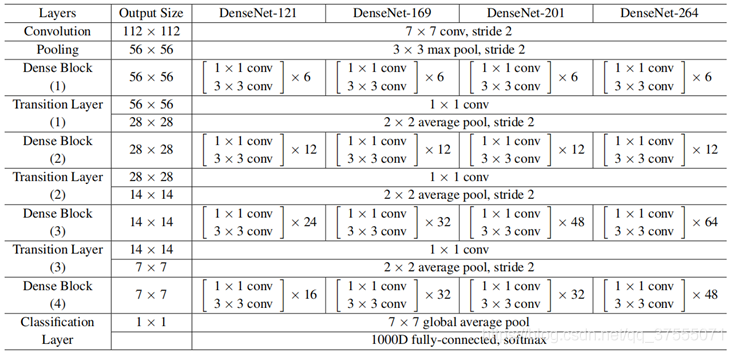

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
#According to DN architecture table, we need class Dense Block, TransitionLayer, for DenseNet
class DenseBlock(nn.Module):
    def __init__(self, in_channels, growth_rate, num_layers):
        super(DenseBlock, self).__init__()
        self.layers = nn.ModuleList()
        for i in range(num_layers):
            self.layers.append(nn.Sequential(
                nn.BatchNorm2d(in_channels + i * growth_rate),
                nn.ReLU(inplace=True),
                nn.Conv2d(in_channels + i * growth_rate, growth_rate, kernel_size=3, padding=1)
            ))
            
    def forward(self, x):
        features = [x]
        for layer in self.layers:
            new_feature = layer(torch.cat(features, dim=1))
            features.append(new_feature)
        return torch.cat(features, dim=1)
        

class TransitionLayer(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(TransitionLayer, self).__init__()
        self.layers = nn.Sequential(
            nn.BatchNorm2d(in_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels, out_channels, kernel_size=1),
            nn.AvgPool2d(kernel_size=2, stride=2)
        )
        
    def forward(self, x):
        return self.layers(x)


class DenseNet(nn.Module):
    def __init__(self, num_classes=4, growth_rate=32, block_config=(6, 12, 24, 16)):
        super(DenseNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 2*growth_rate, kernel_size=3, padding=1),
            nn.BatchNorm2d(2*growth_rate),
            nn.ReLU(inplace=True),

            DenseBlock(2*growth_rate, growth_rate, block_config[0]),
            TransitionLayer(2*growth_rate + block_config[0]*growth_rate, growth_rate*2),
            DenseBlock(2*growth_rate, growth_rate, block_config[1]),
            TransitionLayer(2*growth_rate + block_config[1]*growth_rate, growth_rate*4),
            DenseBlock(2*growth_rate, growth_rate, block_config[2]),
            TransitionLayer(2*growth_rate + block_config[2]*growth_rate, growth_rate*8),
            DenseBlock(2*growth_rate, growth_rate, block_config[3]),

            nn.BatchNorm2d(2*growth_rate + block_config[3]*growth_rate),
            nn.ReLU(inplace=True),
            nn.AdaptiveAvgPool2d((1, 1))
        )
        self.classifier = nn.Linear(2*growth_rate + block_config[3]*growth_rate, num_classes)
        
    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import mlflow


class DenseBlock(nn.Module):
    def __init__(self, in_channels, growth_rate, num_layers):
        super(DenseBlock, self).__init__()
        self.layers = nn.ModuleList()
        for i in range(num_layers):
            self.layers.append(nn.Sequential(
                nn.BatchNorm2d(in_channels + i * growth_rate),
                nn.ReLU(inplace=True),
                nn.Conv2d(in_channels + i * growth_rate, growth_rate, kernel_size=3, padding=1)
            ))
            
    def forward(self, x):
        features = [x]
        for layer in self.layers:
            new_feature = layer(torch.cat(features, dim=1))
            features.append(new_feature)
        return torch.cat(features, dim=1)
        

class TransitionLayer(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(TransitionLayer, self).__init__()
        self.layers = nn.Sequential(
            nn.BatchNorm2d(in_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels, out_channels, kernel_size=1),
            nn.AvgPool2d(kernel_size=2, stride=2)
        )
        
    def forward(self, x):
        return self.layers(x)


class DenseNet(nn.Module):
    def __init__(self, num_classes=10, growth_rate=32, block_config=(6, 12, 24, 16)):
        super(DenseNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 2*growth_rate, kernel_size=3, padding=1),
            nn.BatchNorm2d(2*growth_rate),
            nn.ReLU(inplace=True),
            DenseBlock(2*growth_rate, growth_rate, block_config[0]),
            TransitionLayer(2*growth_rate + block_config[0]*growth_rate, growth_rate*2),
            DenseBlock(2*growth_rate, growth_rate, block_config[1]),
            TransitionLayer(2*growth_rate + block_config[1]*growth_rate, growth_rate*4),
            DenseBlock(2*growth_rate, growth_rate, block_config[2]),
            TransitionLayer(2*growth_rate + block_config[2]*growth_rate, growth_rate*8),
            DenseBlock(2*growth_rate, growth_rate, block_config[3]),
            nn.BatchNorm2d(2*growth_rate + block_config[3]*growth_rate),
            nn.ReLU(inplace=True),
            nn.AdaptiveAvgPool2d((1, 1))
        )
        self.classifier = nn.Linear(2*growth_rate + block_config[3]*growth_rate, num_classes)
        
    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x


def train(model, device, train_loader, optimizer, epoch, log_interval=100):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            mlflow.log_metric('loss', loss.item(), step=batch_idx)
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
        
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.cross_entropy(output, target, reduction='sum').item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
            test_loss /= len(test_loader.dataset)
            accuracy = 100. * correct / len(test_loader.dataset)

            mlflow.log_metric('test_loss', test_loss, step=epoch)
            mlflow.log_metric('accuracy', accuracy, step=epoch)
            print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)'.format(
                test_loss, correct, len(test_loader.dataset), accuracy))



In [ ]:
def main():
    # Set up device
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

# Set up hyperparameters
batch_size = 64
epochs = 10
learning_rate = 0.01

# Set up data transforms and loaders
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])
# Define training set、validation set、testing Dataset
train_dataset = torchvision.datasets.ImageFolder(root='/home/kevinluo/breast_density_classification/datasets/train', transform=transform)
valid_dataset = torchvision.datasets.ImageFolder(root='/home/kevinluo/breast_density_classification/datasets/valid', transform=transform)
test_dataset = torchvision.datasets.ImageFolder(root='/home/kevinluo/breast_density_classification/datasets/test', transform=transform)

# training set、validation set、testing Dataset DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Initialize model, optimizer, and mlflow tracking
model = DenseNet(num_classes=4, growth_rate=32, block_config=(6, 12, 24, 16)).to(device)
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=1e-4)
mlflow.set_tracking_uri('file:/path/to/mlflow')
with mlflow.start_run():
    mlflow.log_param('batch_size', batch_size)
    mlflow.log_param('epochs', epochs)
    mlflow.log_param('learning_rate', learning_rate)
    
    # Train and test model for each epoch
    for epoch in range(1, epochs + 1):
        train(model, device, train_loader, optimizer, epoch)
        test(model, device, test_loader)
        mlflow.pytorch.log_model(model, 'models')

if __name__ == '__main__':
    main()
        


## Regression

Epoch 1 loss: 0.831
Epoch 2 loss: 0.771
Epoch 3 loss: 0.722
Epoch 4 loss: 0.666
Epoch 5 loss: 0.666
Epoch 6 loss: 0.632
Epoch 7 loss: 0.602
Epoch 8 loss: 0.568
Epoch 9 loss: 0.542
Epoch 10 loss: 0.502
Epoch 11 loss: 0.466
Epoch 12 loss: 0.445
Epoch 13 loss: 0.410
Epoch 14 loss: 0.363
Epoch 15 loss: 0.336
Epoch 16 loss: 0.299
Epoch 17 loss: 0.252
Epoch 18 loss: 0.225
Epoch 19 loss: 0.211
Epoch 20 loss: 0.165


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (2).

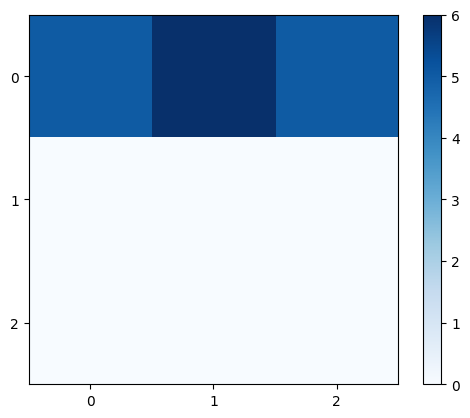

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Set up random seeds to ensure repeatable results
torch.manual_seed(123)

# define the transforms，in order to transfer the images to PyTorch Tensor，and normalize to every pixels
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create datasets for training sets, validation sets, test sets, and apply transformers
train_dataset = torchvision.datasets.ImageFolder(root='/home/kevinluo/breast_density_classification/datasets/train', transform=transform)
valid_dataset = torchvision.datasets.ImageFolder(root='/home/kevinluo/breast_density_classification/datasets/valid', transform=transform)
test_dataset = torchvision.datasets.ImageFolder(root='/home/kevinluo/breast_density_classification/datasets/test', transform=transform)

# Create a DataLoader for subsequent training and testing
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# define simple CNN model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(128 * 28 * 28, 256)
        self.fc2 = nn.Linear(256, 1)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(-1, 128 * 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# create CNN model and set the optimizer and loss function
net = Net()
criterion = nn.MSELoss() #loss function for regression task
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# model training for 20 epochs
for epoch in range(20):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels.float().unsqueeze(1))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print('Epoch %d loss: %.3f' % (epoch + 1, running_loss / len(train_loader)))

# test validation set on trained model，and output the confusion matrix
y_true = []
y_pred = []
with torch.no_grad():
    for data in valid_loader:
        images, labels = data
        outputs = net(images)
        y_true += labels
        predicted = np.round(outputs.numpy())
        y_pred += predicted.tolist()
        cm = confusion_matrix(y_true, y_pred)
        fig, ax = plt.subplots()
        im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        ax.figure.colorbar(im, ax=ax)
        ax.set(xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        xticklabels=[0, 1], yticklabels=[0, 1],
        xlabel='Predicted label',
        ylabel='True label',
        title='Confusion matrix')
        plt.setp(ax.get_xticklabels(), rotation=0, ha="right", rotation_mode="anchor")
        fmt = '.2f'
        thresh = cm.max() / 2.
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
                fig.tight_layout()
                plt.show()


### It should be noted that in the regression task, we converted the label from the original multi-class label (0-3) to the regression label (0/1), and the loss function changed from cross-entropy loss (CrossEntropyLoss) to mean squared error loss (MSELoss). In addition, when we test the model on the validation set, we convert the output values into predicted values and calculate the confusion matrix.

### In this example, we convert multiclass labels (0-3) to regression labels (0/1), where 0 means 1 or 2 breast density and 1 means 3 or 4 breast density. Here is the modified code:

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# set random seed
torch.manual_seed(1234)

# define hyper-parameter
batch_size = 32
learning_rate = 0.001
num_epochs = 5

# define transform
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# load dataset
train_dataset = datasets.ImageFolder(root="/home/kevinluo/breast_density_classification/datasets/train", transform=transform)
valid_dataset = datasets.ImageFolder(root="/home/kevinluo/breast_density_classification/datasets/valid", transform=transform)
test_dataset = datasets.ImageFolder(root="/home/kevinluo/breast_density_classification/datasets/test", transform=transform)

# load dataloader
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(dataset=valid_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# define model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=5, stride=1, padding=2)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2)
        self.fc1 = nn.Linear(32 * 56 * 56, 1000)
        self.fc2 = nn.Linear(1000, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 32 * 56 * 56)
        x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

# Instance model
model = Net()

# define loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
# model's and optimizer's parameters on GPU
model.cuda()
criterion.cuda()

# training model
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # class label to regression label
        images = images.cuda()
        labels = labels.cuda()
        labels = (labels >= 2).float().unsqueeze(1)

        # put data on the GPU
        images = images.cuda()
        labels = labels.cuda()

        # feed forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        # backforward and optimizer
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # calculate training acc
        if (i + 1) % 100 == 0:
            total = labels.size(0)
            predicted = torch.round(outputs)
            correct = (predicted == labels).sum().item()
            accuracy = correct / total
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                .format(epoch + 1, num_epochs, i + 1, len(train_loader), loss.item(), accuracy * 100))

Epoch [1/5], Step [100/116], Loss: 0.4375, Accuracy: 56.25%
Epoch [2/5], Step [100/116], Loss: 0.5625, Accuracy: 43.75%
Epoch [3/5], Step [100/116], Loss: 0.5625, Accuracy: 43.75%
Epoch [4/5], Step [100/116], Loss: 0.5312, Accuracy: 46.88%
Epoch [5/5], Step [100/116], Loss: 0.3438, Accuracy: 65.62%


In [24]:
# validate model
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in valid_loader:
        images = images.cuda()
        labels = labels.cuda()
        # class label to regression label
        labels = (labels >= 2).float().unsqueeze(1)

        # put data on the GPU
        images = images.cuda()
        labels = labels.cuda()

        # feed forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # calculate training acc
        predicted = torch.round(outputs)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Validation Accuracy: {:.2f}%'.format(correct / total * 100))

Validation Accuracy: 53.18%


In [25]:
with torch.no_grad():
    correct = 0
    total = 0
    predictions = []
    for images, labels in test_loader:
    # class label to regression label
        labels = (labels >= 2).float().unsqueeze(1)
            # put data on the GPU
        images = images.cuda()
        labels = labels.cuda()

        # feed forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        # calculate training acc
        predicted = torch.round(outputs)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        predictions += predicted.cpu().numpy().tolist()

    print('Test Accuracy: {:.2f}%'.format(correct / total * 100))


Test Accuracy: 52.68%


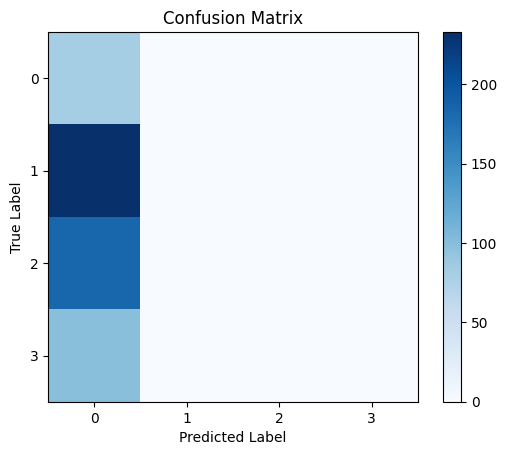

In [27]:
test_labels = test_dataset.targets
test_predictions = np.array(predictions).squeeze()
cm = confusion_matrix(test_labels, test_predictions)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(4))
plt.yticks(np.arange(4))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()